# Constants

In [9]:
NUMBER_OF_PROCESSORS = 20
CLUSTERS_WIDTH = 2
WATER_SIMULATION_IDS = [['B', 1, ' OW '], ['C', 1, ' OW ']]
WATER_REFERENCE_IDS = [['B', 1, ' OW '], ['C', 1, ' OW ']]
FIRST_ATOMS_TO_IGNORE = 0

# Imports

In [2]:
import os
from sklearn import cluster
import matplotlib.pyplot as plt
from matplotlib import patches

from scripts import obtain_water_data_from, get_reference_coords
from scripts import get_density, get_matchs, fulfill_condition
from scripts import add_metrics_to_reports, write_centroids, get_metric
from scripts import get_ordered_matchs, add_matchs_to_reports

#  Bromodomain with water

In [3]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/4STD/with_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [6]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 50 epochs and 6350 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [10]:
ref_coords = get_reference_coords('4STD_original.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

## Clustering

In [12]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

In [13]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

In [14]:
print(reference_clusters)

[0, 3]


## Clustering analysis

In [15]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [16]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

In [17]:
add_metrics_to_reports(matchs_dict, FIRST_ATOMS_TO_IGNORE, reference_clusters) 

## Display results

In [18]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
 *      0        0.237
        1        0.283
        2        0.119
 *      3        0.096
        4        0.064
        5        0.066
        6        0.085
        7        0.018
        8        0.012
        9        0.007
       10        0.004
       11        0.004
       12        0.001
       13        0.004
       14        0.000


In [19]:
write_centroids(estimator, densities, '/home/municoy/LocalResults/waters/4STD/with_water/PDB/4STD_centroids.pdb', normalize=False)

In [21]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Asn123_distance')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters)
add_matchs_to_reports(list_of_reports, matchs)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

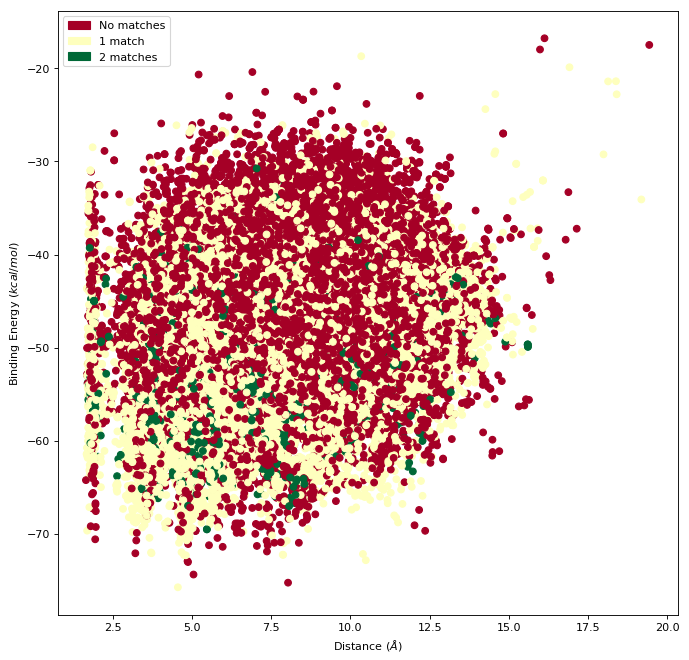

In [22]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

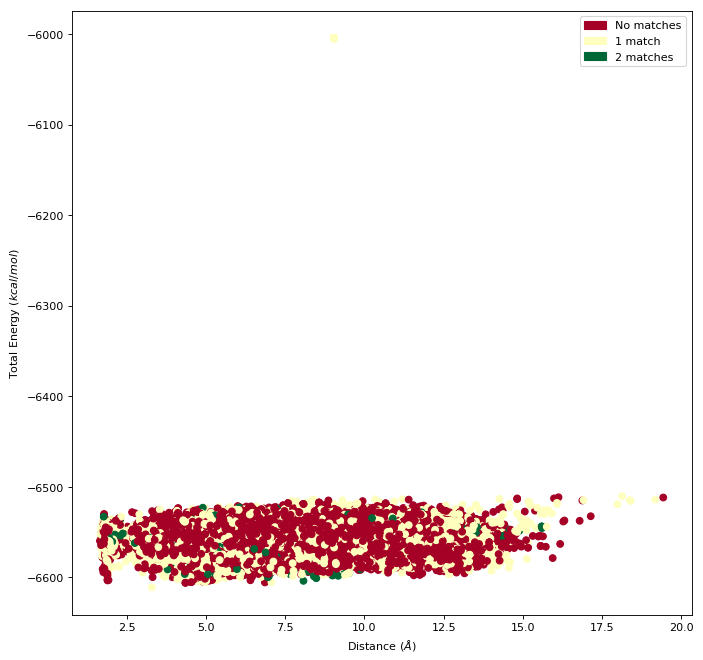

In [23]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

#  Bromodomain without water

In [24]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/4STD/without_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data

In [25]:
_, list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 50 epochs and 6350 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


In [26]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Asn123_distance')
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn

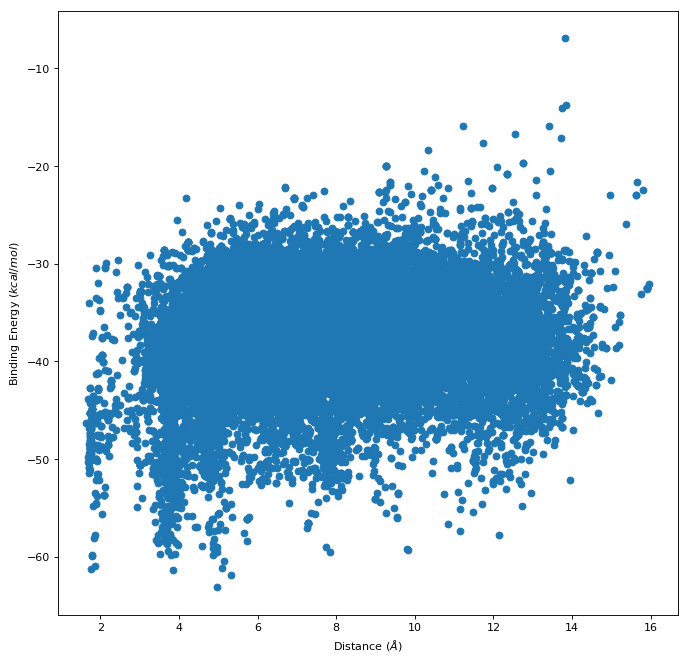

In [28]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, cmap=cmap, norm=norm)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

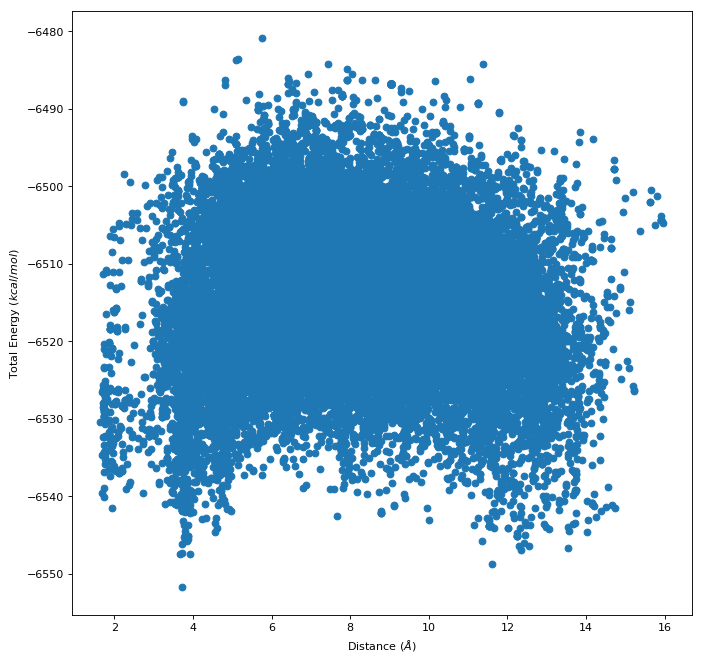

In [30]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, cmap=cmap, norm=norm)
plt.savefig(SIMULATION_PATH + 'Plots/4STD_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

# TODO
- Add distance metric